## Fitting individual Ne line
- Here we show how to fit an individual Ne line, this is strong, so you want 2 peaks for the 1117

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
# Can add path here if diadfit in another folder
#sys.path.append(r'C:\Users\penny\OneDrive - Oregon State University\Postdoc\MeltInclusion_SampleStuff\Peak_Fitting_Tests')
import DiadFit as pf
import os
import re
from os import listdir
from os.path import isfile, join

## Choose file and path here

In [2]:
path=r'C:\Users\penny\OneDrive - Oregon State University\Postdoc\MeltInclusion_SampleStuff\Peak_Fitting_Tests\Example_notebooks_Spectra'
filetype='Witec_ASCII'


## Extract all files with ID_str in their name:
- If you've used a different identifier to Ne, enter it here!

In [3]:
ID_str='Ne' # A string in all your Ne lines but nothing else
file_fmt='txt'
exclude='png'
Allfiles = [f for f in listdir(path) if isfile(join(path, f))]
Ne_files=[item for item in Allfiles if ID_str in item and file_fmt in item and exclude not in item]
prefix=False
#Ne_files

## Select the file you want, go back up to this step per file

In [4]:
filename='42 Ne_Lines_13.txt' ##or loop through by changing the number here Ne_files[0]
print(filename)

42 Ne_Lines_13.txt


## Plot the data, and find approximate peak positions
- This checks your file is actually a Ne line, not mislabelled
- And finds positions of peaks nearest the Ne lines you want. 
- If it doesnt find the peaks, adjust the height, threshold, distance parameters etc from Scipy

42 Ne_Lines_13.txt
Found peaks at wavenumber=
[1104.634984 1117.51087  1135.930916 1220.505213 1310.739623 1398.876628
 1436.330549 1447.878781 1567.003346 1587.42352 ]
selected Peak 1 Pos
1117.51087
selected Peak 2 Pos
1447.878781


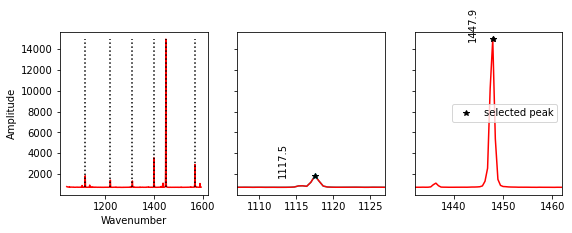

In [5]:
# Exclude range if have, say, some horrid spikes
exclude_range_1=None#[1000, 1113]
exclude_range_2=None#[1130, 1150]
# Put approximate peak centers here you want it to find
peak1_cent=1117
peak2_cent=1447

# For weak Ne lines, use height and prominence=10, for strong, 100
Ne, df_sort_Ne_trim, nearest_pk1, nearest_pk2=pf.plot_Ne_lines(path=path, filename=filename, filetype=filetype,
peak1_cent=peak1_cent, peak2_cent=peak2_cent,
n_peaks=10, height=100, threshold=0.6, distance=1, prominence=100, width=1, 
exclude_range_1=exclude_range_1, exclude_range_2=exclude_range_2)


## Fit the peaks
- Most the time, this will just run using the peak positions from above
- There are lots of other parameters you can edit, do help (pf.fit_Ne_Lines) to see them. 

first iteration, peak Center=1117.5549
first iteration, peak Amplitude=1559.2229
Trying to place second peak between 1112.55and1115.55
Error bars not determined by function


,File_Name,1447_peak_cent,error_1447,1117_peak_cent,error_1117,deltaNe,Ne_Corr,Ne_Corr_min,Ne_Corr_max,residual_1447,residual_1117
0,42 Ne_Lines_13.txt,1447.740003,0.00858,1117.559921,NaN,330.180081,1.000901,NaN,NaN,186.68309,11.541106


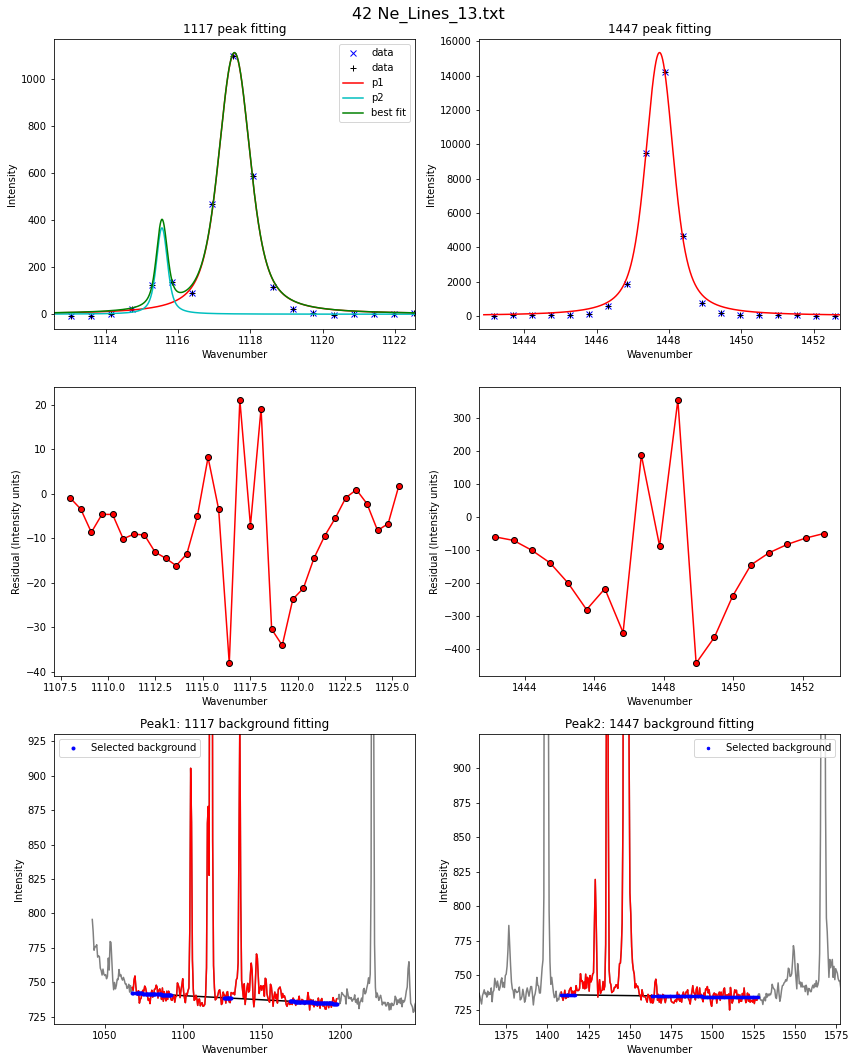

In [6]:

#If you have weak Ne lines and no secondary peak, set to 1
peaks_1=2

# Determines how far from the peak center the 2nd peak is. 
LH_offset_mini=[2, 5]
# If fit really bad, try tweaking the amplitude here
amplitude=100
#x_range - Determins how much outside your selected background position the plot shows
x_range=50
# Y range- Determins how much y axis you get above the baseline on the plot
y_range=200
# Backgrounds, relative to peak center. Adjust in function. 

# To see other parameters you can tweak, do help(pf.fit_Ne_lines) if this isn't working fo your spectra. 
df_test, Ne_1117_reg_x_plot, Ne_1117_reg_y_plot=pf.fit_Ne_lines(
Ne=Ne, filename=filename, path=path, prefix=prefix,
LH_offset_mini=LH_offset_mini, peaks_1=peaks_1,
Ne_center_1=nearest_pk1, Ne_center_2=nearest_pk2,
lower_bck_pk1=[-50, -25], upper_bck1_pk1=[8, 13], upper_bck2_pk1=[50, 80],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[15, 50], upper_bck2_pk2=[50, 80],
amplitude=amplitude, x_range=x_range, y_range=y_range)

df_test
